# Load Data

In [ ]:
# load data from github

!git clone https://github.com/Yusufislam-id/ENTROPY-CODAS.git

Cloning into 'ENTROPY-CODAS'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 36 (delta 9), reused 29 (delta 4), pack-reused 0 (from 0)
Receiving objects: 100% (36/36), 6.45 KiB | 6.45 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [ ]:
!pip install pyDecision

import numpy as np
import csv

from tabulate import tabulate
from pyDecision.algorithm import entropy_method, codas_method
from pyDecision.compare import corr_viz, compare_ranks_crisp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.5/119.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.9/386.9 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.2/325.2 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.7/249.7 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.8 MB/s eta 0:00:00


In [ ]:
# load data alternatif dan kriteria
with open('/content/ENTROPY-CODAS/data.csv', 'r') as f:
  reader = csv.reader(f)
  data = list(reader)
  print(data)

# load data historis nilai akhir
with open('/content/ENTROPY-CODAS/NilaiAkhir.csv', 'r') as f:
  reader = csv.reader(f)
  nilai_akhir = list(reader)
  print(nilai_akhir)

[['30', '25.714', '38', '100', '5'], ['60', '91.429', '50', '94.444', '5'], ['88', '100', '24', '100', '5'], ['62', '91.429', '74', '83.333', '5'], ['84', '62.857', '46', '38.889', '5'], ['8', '40', '12', '38.889', '5'], ['54', '94.286', '86', '66.667', '5'], ['78', '94.286', '68', '83.333', '5'], ['50', '77.143', '52', '61.111', '2'], ['54', '34.286', '24', '100', '2'], ['60', '94.286', '74', '94.444', '4'], ['40', '71.429', '28', '94.444', '4'], ['78', '80', '58', '61.111', '4'], ['58', '80', '72', '61.111', '4'], ['78', '37.143', '40', '55.556', '4'], ['32', '74.286', '62', '66.667', '4'], ['94', '94.286', '82', '83.333', '5'], ['48', '62.857', '62', '50', '2'], ['26', '88.571', '60', '61.111', '2'], ['46', '42.857', '30', '50', '2'], ['6', '34.286', '30', '83.333', '2'], ['44', '85.714', '62', '72.222', '2'], ['54', '65.714', '48', '77.778', '2'], ['22', '77.143', '46', '61.111', '2'], ['24', '77.143', '56', '83.333', '2'], ['26', '57.143', '56', '66.667', '2'], ['38', '48.571', '5

# Transformasi Data

In [ ]:
# merubah bentuk data
# Data awal berbentuk list of string
# Data dirubah ke bentuk list of int/float
# Kemudian Data dirubah dari list ke bentuk numpy array
def convert_to_float(input_list):
  return [[float(element) for element in sublist] for sublist in input_list]

data = convert_to_float(data)
print(data)

nilai_akhir = convert_to_float(nilai_akhir)
print(nilai_akhir)

[[30.0, 25.714, 38.0, 100.0, 5.0], [60.0, 91.429, 50.0, 94.444, 5.0], [88.0, 100.0, 24.0, 100.0, 5.0], [62.0, 91.429, 74.0, 83.333, 5.0], [84.0, 62.857, 46.0, 38.889, 5.0], [8.0, 40.0, 12.0, 38.889, 5.0], [54.0, 94.286, 86.0, 66.667, 5.0], [78.0, 94.286, 68.0, 83.333, 5.0], [50.0, 77.143, 52.0, 61.111, 2.0], [54.0, 34.286, 24.0, 100.0, 2.0], [60.0, 94.286, 74.0, 94.444, 4.0], [40.0, 71.429, 28.0, 94.444, 4.0], [78.0, 80.0, 58.0, 61.111, 4.0], [58.0, 80.0, 72.0, 61.111, 4.0], [78.0, 37.143, 40.0, 55.556, 4.0], [32.0, 74.286, 62.0, 66.667, 4.0], [94.0, 94.286, 82.0, 83.333, 5.0], [48.0, 62.857, 62.0, 50.0, 2.0], [26.0, 88.571, 60.0, 61.111, 2.0], [46.0, 42.857, 30.0, 50.0, 2.0], [6.0, 34.286, 30.0, 83.333, 2.0], [44.0, 85.714, 62.0, 72.222, 2.0], [54.0, 65.714, 48.0, 77.778, 2.0], [22.0, 77.143, 46.0, 61.111, 2.0], [24.0, 77.143, 56.0, 83.333, 2.0], [26.0, 57.143, 56.0, 66.667, 2.0], [38.0, 48.571, 54.0, 55.556, 5.0], [2.0, 74.286, 34.0, 100.0, 5.0], [2.0, 42.857, 42.0, 55.556, 5.0], [28

# Pembobotan Entropy

In [ ]:
# Metode Entropy

# Load Criterion Type: 'max' or 'min'
criteria = ['C1', 'C2', 'C3', 'C4', 'C5']
criterion_type = ['max', 'max', 'max', 'max', 'max']
# Dataset
# membuat matriks dengan numpy
dataset = np.array(data)

# melakukan pembobotan dengan metode entropy
weights = entropy_method(dataset, criterion_type)
# pembulatan hasil pembobotan
for i in range(0, weights.shape[0]):
  print('w(c'+str(i+1)+'): ', round(weights[i], 3))

w(c1):  0.494
w(c2):  0.165
w(c3):  0.15
w(c4):  0.064
w(c5):  0.127


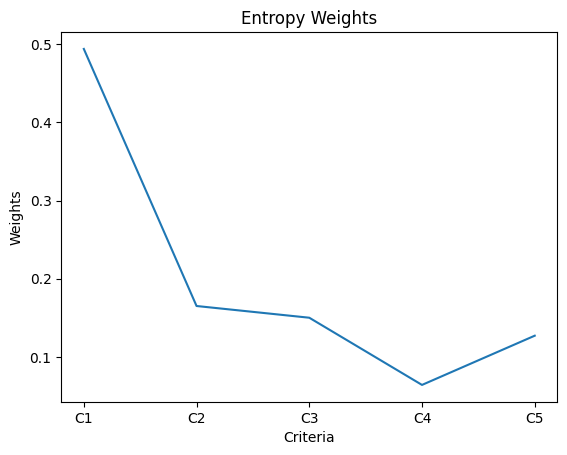

In [ ]:
import matplotlib.pyplot as plt
plt.plot(criteria, weights)
plt.xlabel('Criteria')
plt.ylabel('Weights')
plt.title('Entropy Weights')
plt.show()

In [ ]:
import plotly.graph_objects as go

graph = go.Figure(data= go.Scatter(x=criteria, y=weights))
graph.update_layout(title_text='Pembobotan Entropy',
                    title_xanchor='center', title_x=0.5,
                    title_yanchor='top', title_y=0.9,

                    xaxis_title='Kriteria', yaxis_title='Bobot')
graph.show()

# CODAS

In [ ]:
# CODAS
# Load Criterion Type: 'max' or 'min'
criterion_type = ['max', 'max', 'max', 'max', 'max']
weights = [0.494, 0.165, 0.15, 0.064, 0.127]
# Call CODAS Function
nilai_akhir_codas = codas_method(dataset, weights,
                                 criterion_type,lmbd = 0.02,
                                 graph = False, verbose = True)

a1: -3.899
a2: 5.822
a3: 13.78
a4: 6.836
a5: 11.872
a6: -8.886
a7: 5.152
a8: 11.209
a9: 1.989
a10: 2.021
a11: 6.163
a12: -0.913
a13: 10.399
a14: 5.023
a15: 9.5
a16: -2.178
a17: 16.067
a18: 1.245
a19: -3.264
a20: -0.388
a21: -11.043
a22: 0.962
a23: 2.755
a24: -5.259
a25: -4.372
a26: -4.918
a27: -1.321
a28: -6.592
a29: -8.353
a30: -3.744
a31: -8.364
a32: 3.92
a33: 4.362
a34: 3.995
a35: -5.492
a36: 3.611
a37: 9.934
a38: -5.79
a39: -1.636
a40: -0.497
a41: 5.847
a42: -6.608
a43: -3.064
a44: -4.016
a45: -5.013
a46: -2.44
a47: 2.194
a48: -7.26
a49: 13.493
a50: -9.119
a51: -1.654
a52: -7.125
a53: -9.756
a54: -0.488
a55: -1.008
a56: 0.125
a57: -6.392
a58: -4.968


# Korelasi Rank Spearman

In [ ]:
# mengambil nilai akhir codas
nilai_akhir_codas = [[item[1]] for item in nilai_akhir_codas]

In [ ]:
# merubah bentuk list
def flatten_list(lst):
  return [item[0] for item in lst]
nilai_akhir_codas = flatten_list(nilai_akhir_codas)

In [ ]:
def flatten_list_of_lists(list_of_lists):
  return [item for sublist in list_of_lists for item in sublist]
nilai_akhir = flatten_list_of_lists(nilai_akhir)

In [ ]:
print("nilai akhir historis :", nilai_akhir)
print("nilai akhir codas :", nilai_akhir_codas)

nilai akhir historis : [48.429, 73.968, 78.0, 77.691, 57.937, 24.722, 75.238, 80.905, 60.064, 53.072, 80.683, 58.468, 69.278, 67.778, 52.675, 58.738, 88.405, 55.714, 58.921, 42.214, 38.405, 65.984, 61.373, 51.564, 60.119, 51.453, 49.032, 52.572, 35.603, 45.675, 43.786, 63.849, 55.675, 79.016, 57.381, 71.984, 68.873, 41.389, 44.429, 48.635, 68.524, 51.865, 64.611, 57.627, 54.31, 71.968, 61.564, 50.508, 85.445, 30.889, 42.143, 46.413, 40.802, 48.675, 65.159, 40.706, 35.635, 54.016]
nilai akhir codas : [-3.8991714353525504, 5.822348736749848, 13.780032450941267, 6.8362396487678385, 11.871929915037118, -8.886204876793832, 5.152136317918715, 11.209269754159761, 1.9890720378376703, 2.0211129457297408, 6.162880115619411, -0.9126320930588888, 10.398626849759303, 5.022589387503921, 9.500281642557443, -2.1781408855196016, 16.067235299675986, 1.2445409788866477, -3.263827312596513, -0.3875394669412419, -11.042507428149712, 0.9615310635467521, 2.7553063520189904, -5.2586958961567865, -4.3721440815

In [ ]:
# Menggabungkan 2 list menjadi 1
combined_list = [nilai_akhir, nilai_akhir_codas]
print(combined_list)

[[48.429, 73.968, 78.0, 77.691, 57.937, 24.722, 75.238, 80.905, 60.064, 53.072, 80.683, 58.468, 69.278, 67.778, 52.675, 58.738, 88.405, 55.714, 58.921, 42.214, 38.405, 65.984, 61.373, 51.564, 60.119, 51.453, 49.032, 52.572, 35.603, 45.675, 43.786, 63.849, 55.675, 79.016, 57.381, 71.984, 68.873, 41.389, 44.429, 48.635, 68.524, 51.865, 64.611, 57.627, 54.31, 71.968, 61.564, 50.508, 85.445, 30.889, 42.143, 46.413, 40.802, 48.675, 65.159, 40.706, 35.635, 54.016], [-3.8991714353525504, 5.822348736749848, 13.780032450941267, 6.8362396487678385, 11.871929915037118, -8.886204876793832, 5.152136317918715, 11.209269754159761, 1.9890720378376703, 2.0211129457297408, 6.162880115619411, -0.9126320930588888, 10.398626849759303, 5.022589387503921, 9.500281642557443, -2.1781408855196016, 16.067235299675986, 1.2445409788866477, -3.263827312596513, -0.3875394669412419, -11.042507428149712, 0.9615310635467521, 2.7553063520189904, -5.2586958961567865, -4.372144081593837, -4.918291971835203, -1.32105222323

In [ ]:
# OPTIONAL - Load Other Custom Methods
custom_m = ['historis', 'entropy-codas']
# load ranking per metode
custom_r = combined_list

In [ ]:
# Compare
values, ranks = compare_ranks_crisp(dataset, weights, criterion_type,
                                    custom_methods       = custom_m,
                                    custom_ranks         = custom_r)

historis : Done!
entropy-codas : Done!


In [ ]:
# Print Nilai Akhir dari tiap metode
print(tabulate(values, headers = 'keys', tablefmt = 'psql'))

+-----+------------+-----------------+
|     |   historis |   entropy-codas |
|-----+------------+-----------------|
| a1  |     48.429 |       -3.89917  |
| a2  |     73.968 |        5.82235  |
| a3  |     78     |       13.78     |
| a4  |     77.691 |        6.83624  |
| a5  |     57.937 |       11.8719   |
| a6  |     24.722 |       -8.8862   |
| a7  |     75.238 |        5.15214  |
| a8  |     80.905 |       11.2093   |
| a9  |     60.064 |        1.98907  |
| a10 |     53.072 |        2.02111  |
| a11 |     80.683 |        6.16288  |
| a12 |     58.468 |       -0.912632 |
| a13 |     69.278 |       10.3986   |
| a14 |     67.778 |        5.02259  |
| a15 |     52.675 |        9.50028  |
| a16 |     58.738 |       -2.17814  |
| a17 |     88.405 |       16.0672   |
| a18 |     55.714 |        1.24454  |
| a19 |     58.921 |       -3.26383  |
| a20 |     42.214 |       -0.387539 |
| a21 |     38.405 |      -11.0425   |
| a22 |     65.984 |        0.961531 |
| a23 |     61.373 |     

In [ ]:
# Print Ranks dari tiap metode
print(tabulate(ranks, headers = 'keys', tablefmt = 'psql'))

+-----+------------+-----------------+
|     |   historis |   entropy-codas |
|-----+------------+-----------------|
| a1  |         44 |              39 |
| a2  |          9 |              12 |
| a3  |          6 |               2 |
| a4  |          7 |               9 |
| a5  |         27 |               4 |
| a6  |         58 |              55 |
| a7  |          8 |              13 |
| a8  |          3 |               5 |
| a9  |         23 |              22 |
| a10 |         34 |              21 |
| a11 |          4 |              10 |
| a12 |         26 |              29 |
| a13 |         12 |               6 |
| a14 |         15 |              14 |
| a15 |         35 |               8 |
| a16 |         25 |              34 |
| a17 |          1 |               1 |
| a18 |         30 |              23 |
| a19 |         24 |              37 |
| a20 |         49 |              26 |
| a21 |         54 |              58 |
| a22 |         16 |              24 |
| a23 |         21 |     

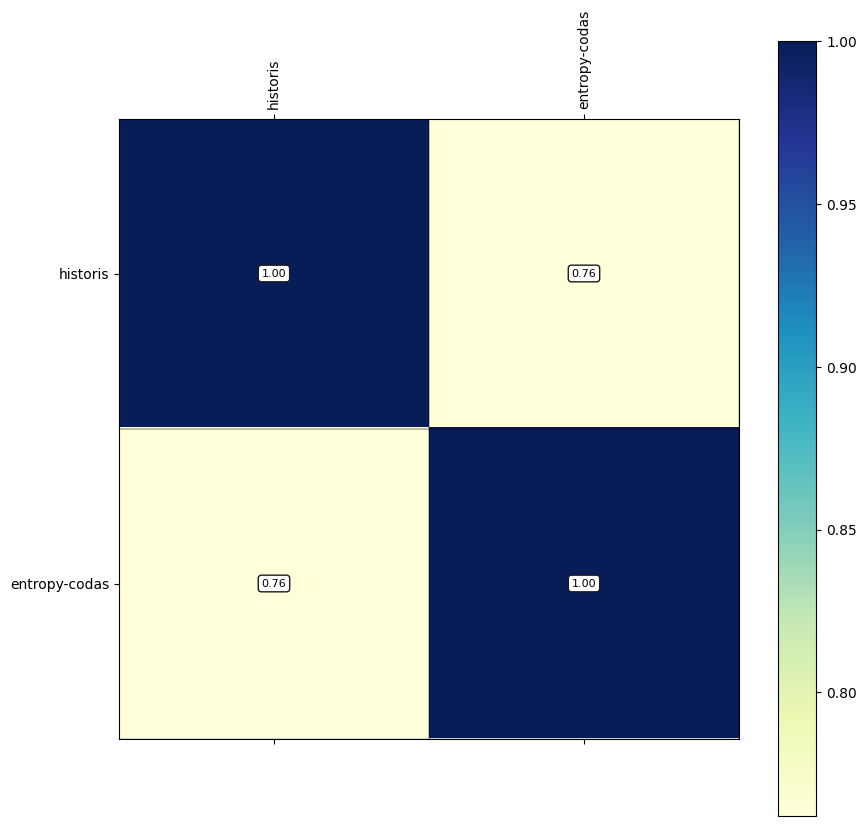

In [ ]:
# Plot Correlations
method = 'spearman' # 'pearson', 'kendall',
corr   = corr_viz(ranks, correlation_method = method, size = 10,
                  font_size = 8, graph = True)

# Ekstrak data ke excel

In [ ]:
import pandas as pd
hasil_akhir = pd.DataFrame(values)
hasil_akhir.to_excel('hasil_akhir.xlsx', index=False)

In [ ]:
rank_akhir = pd.DataFrame(ranks)
rank_akhir.to_excel('rank.xlsx', index=False)

# Korelasi Rank Spearman Kombinasi Pembobotan Entropy dengan metode-metode lain

In [ ]:
methods_list = ['aras', 'cocoso', 'copras',  'edas',  'mabac',  'moora',
                 'oreste', 'topsis', 'vikor', 'waspas']
values, ranks = compare_ranks_crisp(dataset, weights, criterion_type,
                                    custom_methods       = custom_m,
                                    custom_ranks         = custom_r,
                                    methods_list         = methods_list)

historis : Done!
entropy-codas : Done!
ARAS: Done!
CoCoSo: Done!
COPRAS: Done!
EDAS: Done!
MABAC: Done!
MOORA: Done!
ORESTE: Done!
TOPSIS: Done!
VIKOR: Done!
WASPAS: Done!


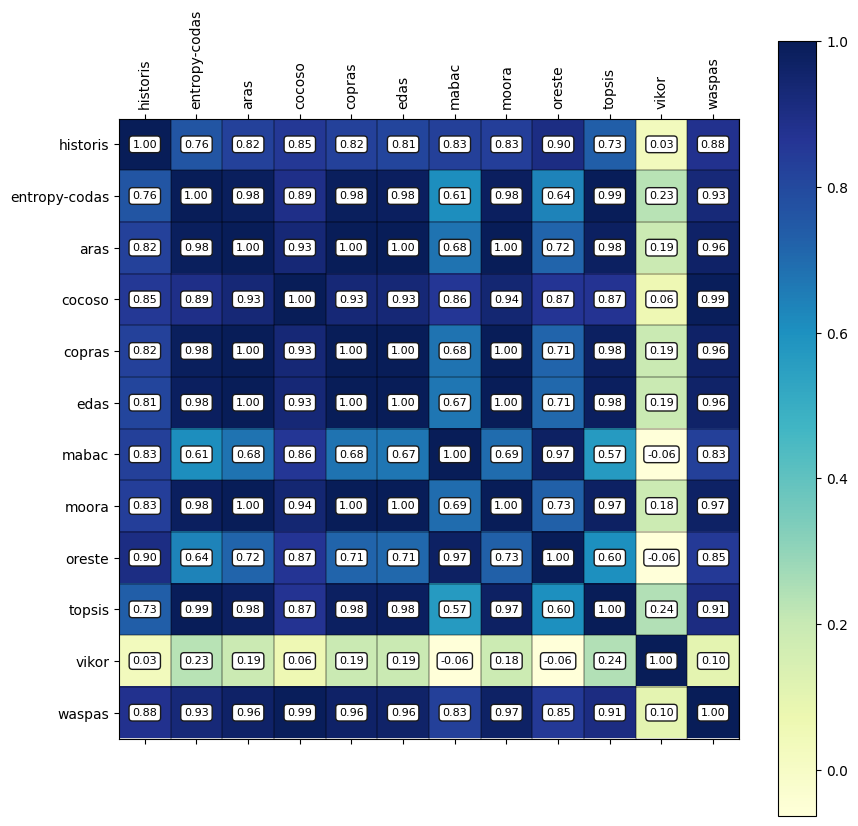

In [ ]:
# Plot Correlations
method = 'spearman' # 'pearson', 'kendall',
corr   = corr_viz(ranks, correlation_method = method, size = 10,
                  font_size = 8, graph = True)